In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture

# Generate synthetic data
np.random.seed(0)
data = np.vstack([
    np.random.normal(loc=-3, scale=0.5, size=(300, 2)),
    np.random.normal(loc=3, scale=1, size=(700, 2))
])

# Fit Bayesian Gaussian Mixture
bgm = BayesianGaussianMixture(n_components=20,
                              covariance_type='full',
                              max_iter=1000,
                              random_state=0)
bgm.fit(data)

# Visualize the effective number of components
print("Weight of each component:", bgm.weights_)


Weight of each component: [7.00264722e-01 2.99685496e-01 4.74110895e-05 2.25767093e-06
 1.07508139e-07 5.11943521e-09 2.43782629e-10 1.16086966e-11
 5.52795077e-13 2.63235751e-14 1.25350358e-15 5.96906465e-17
 2.84241174e-18 1.35352940e-19 6.44537809e-21 3.06922766e-22
 1.46153698e-23 6.95969992e-25 3.31414282e-26 1.57816325e-27]


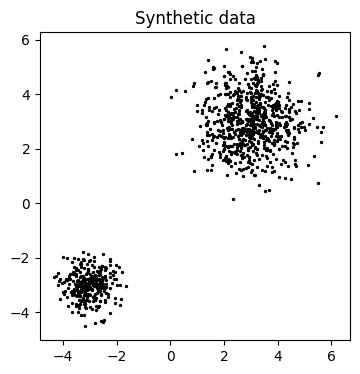

In [24]:
# plot the data
plt.figure(figsize=(4, 4))
plt.scatter(data[:, 0], data[:, 1], s=2, c='black')
plt.title("Synthetic data")
plt.show()

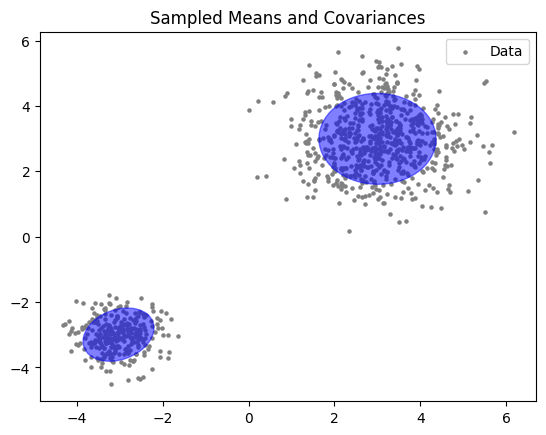

In [25]:
# Sampling from the posterior distribution of the means
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=5, color='gray', label='Data')
for mean, covar, weight in zip(bgm.means_, bgm.covariances_, bgm.weights_):
    if weight > 0.01:  # only significant components
        # Draw uncertainty circle for each component
        v, w = np.linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = plt.matplotlib.patches.Ellipse(xy=mean, width=v[0], height=v[1], angle=180. + angle, color='blue')
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

ax.set_title('Sampled Means and Covariances')
ax.legend()
plt.show()